# BigMart Sales Data
##### By Chinthaka Liyana Arachchi (2020-06-01)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_train=pd.read_csv('Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Dataset Summary
### Understand the features and checking the dataset for missing values
##### Total Number of Rows = 8523, Total Number of Columns = 12
##### Missing values in Item_Weight (7060 non-null   float64) & Outlet_Size (6113 non-null   object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


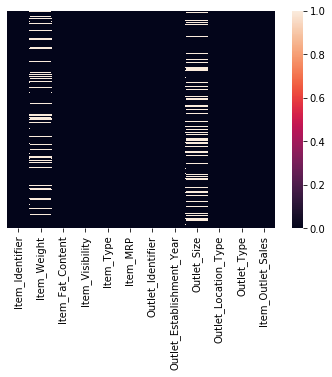

In [3]:
df_train.info()
df_train.isnull().sum()
sns.heatmap(df_train.isnull(), yticklabels=False)

### Understand and get statistical values for <b>Item_Weight</b> wrt Item_Type - Remove Null Values

In [4]:
weight_grp=df_train.groupby(['Item_Type','Outlet_Location_Type'])
weight_grp=weight_grp['Item_Weight'].agg(['count','min','max','mean','median']).reset_index()
weight_grp.head()

,Item_Type,Outlet_Location_Type,count,min,max,mean,median
0,Baking Goods,Tier 1,142,4.880,20.85,12.202113,11.15
1,Baking Goods,Tier 2,211,4.880,20.85,12.438460,11.85
2,Baking Goods,Tier 3,183,4.880,20.85,12.149262,11.65
3,Breads,Tier 1,51,4.635,20.85,10.892843,9.80
4,Breads,Tier 2,84,4.635,20.85,11.248869,10.60


#### Replace null values with mean values by considering the product type. (To Item_Weight column)

In [5]:
def add_weight(cols):
    weight=cols[0]
    itype=cols[1]
    location=cols[2]
    
    if pd.isnull(weight):
        for items in weight_grp.itertuples():
            if (items[1]==itype) and (items[2]==location):
                return items[6]
    else:
        return weight

In [6]:
df_train['Item_Weight']=df_train[['Item_Weight','Item_Type','Outlet_Location_Type']].apply(add_weight, axis=1)
df_train['Item_Weight'].head(10)

0     9.300000
1     5.920000
2    17.500000
3    19.200000
4     8.930000
5    10.395000
6    13.650000
7    13.139893
8    16.200000
9    19.200000
Name: Item_Weight, dtype: float64

### Removed null values in Item_Weight Column
#### Summary as follows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


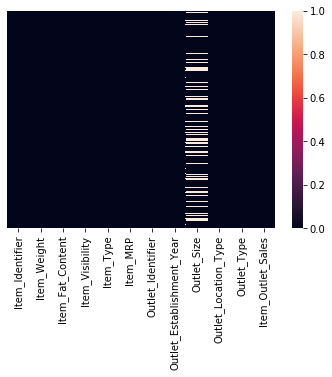

In [7]:
df_train.info()
df_train.isnull().sum()
sns.heatmap(df_train.isnull(), yticklabels=False)

### Understand and get statistical values for Outlet_Size wrt Outlet_Location_Type & Outlet_Type - Remove Null Values 

In [8]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


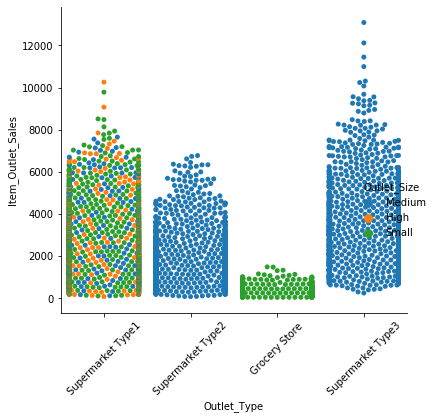

In [9]:
g=sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=df_train, kind='swarm')
plt.tight_layout()
g.set_xticklabels(rotation=45)

##### FIndings : We can replace Supermarket Type 2 & Type 3 as Medium and Grocery Stores as Small. But there's issue with Supermarket Type 1 (Above Line)
##### With Following plot, we can say that if It's supermarket type 1 & Tier 2 => Small, supermarket type 1 & Tier 3 => High (But we can't explicitly say that supermarket type 1 & Tier 1 result. It may be Small or Medium
###### If Supermarket Type 2 or Supermarket Type 2 => Medium
###### If Grocery Store => Small
###### If supermarket type 1 & Tier 2 => Small
###### If supermarket type 1 & Tier 3 => High

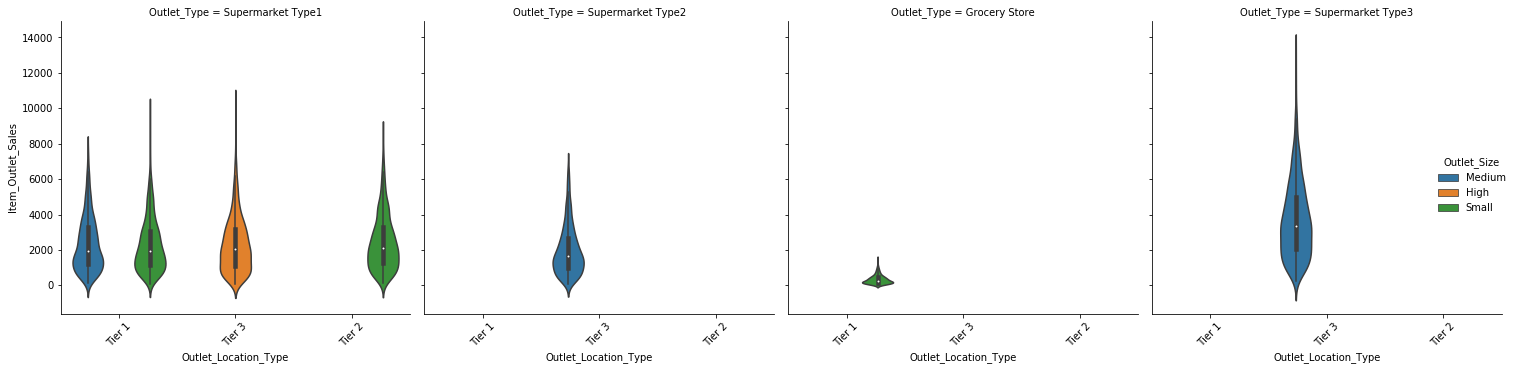

In [10]:
g2=sns.catplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=df_train, kind='violin', col='Outlet_Type')
plt.tight_layout()
g2.set_xticklabels(rotation=45)

#### Understand the missing values in Outlet_Size variable more

In [11]:
osize_grp=df_train.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'])
osize_grp=osize_grp['Outlet_Size'].count()
osize_grp

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: Outlet_Size, dtype: int64

In [12]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Fill missing Values

In [14]:
def add_osize(cols):
    osize=cols[0]
    olocation=cols[1]
    otype=cols[2]
    
    if pd.isnull(osize):
        if (otype=='Supermarket Type2') or (otype=='Supermarket Type3'):
            return 'Medium'
        elif otype=='Grocery Store':
            return 'Small'
        else:
            if olocation=='Tier 2':
                return 'Small'
            elif olocation=='Tier 3':
                return 'High'
            else:
                return 'Small'
    else:
        return osize
        

In [15]:
df_train['Outlet_Size']=df_train[['Outlet_Size','Outlet_Location_Type','Outlet_Type']].apply(add_osize, axis=1)
df_train['Outlet_Size'].head(10)

0    Medium
1    Medium
2    Medium
3     Small
4      High
5    Medium
6      High
7    Medium
8     Small
9     Small
Name: Outlet_Size, dtype: object

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

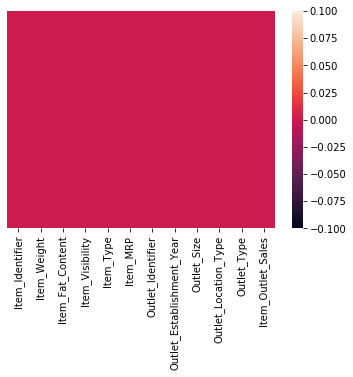

In [16]:
sns.heatmap(df_train.isnull(), yticklabels=False)
df_train['Outlet_Size'].value_counts()

### Missing values filling completed. 
##### All 'Outlet_Size' missing values falls under 'Small' category. Therefore with the above justification, the prediction accuracy was 100%

In [17]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011243,0.026073,-0.011932,0.013448
Item_Visibility,-0.011243,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.026073,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011932,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013448,-0.128625,0.567574,-0.049135,1.000000


## The impact on Sales by refering Visibility factor (Visibility, Item Type and Total Sale)

In [18]:
visib_grp=df_train.groupby(['Item_Visibility','Item_Type'])
visib_grp=visib_grp[['Item_Outlet_Sales']].mean().reset_index()
visib_grp

,Item_Visibility,Item_Type,Item_Outlet_Sales
0,0.000000,Baking Goods,1598.334276
1,0.000000,Breads,2612.090059
2,0.000000,Breakfast,1828.064867
3,0.000000,Canned,2257.667273
4,0.000000,Dairy,2220.057537
...,...,...,...
8001,0.309390,Household,138.486400
8002,0.311090,Baking Goods,154.465600
8003,0.321115,Fruits and Vegetables,199.740000
8004,0.325781,Household,761.009400


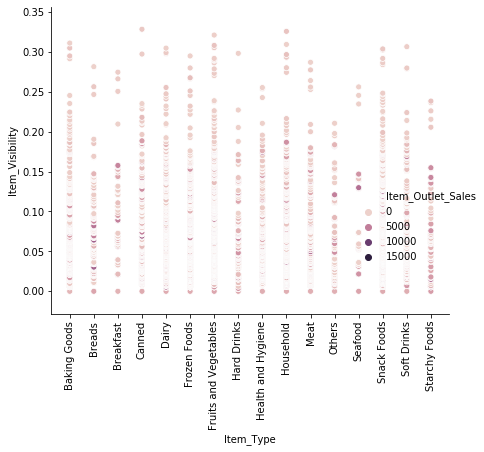

In [19]:
g3=sns.relplot(hue='Item_Outlet_Sales', y='Item_Visibility', data=visib_grp, x='Item_Type')
plt.tight_layout()
g3.set_xticklabels(rotation=90)

##### As correlation, r value between Item_Visibility & Item_Outlet_Sales (-0.128625), there is a negative trend where Item_Visibility is getting closer to 0 (zero), the sales values tends to the maximum. 
##### But when it comes to above diagram, there's no significant relationship with product type with reference to the relationship to Item_Visibility & Item_Outlet_Sales variables.

## The impact on Sales by refering Visibility factor (Visibility, Item Type and Total Sale, Outlet_Location_Type)

In [20]:
visib_grp2=df_train.groupby(['Item_Visibility','Outlet_Location_Type','Outlet_Type'])
visib_grp2=visib_grp2[['Item_Outlet_Sales']].mean().reset_index()
visib_grp2

,Item_Visibility,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.000000,Tier 1,Grocery Store,301.740560
1,0.000000,Tier 1,Supermarket Type1,2185.319130
2,0.000000,Tier 2,Supermarket Type1,2400.602964
3,0.000000,Tier 3,Grocery Store,389.056786
4,0.000000,Tier 3,Supermarket Type1,2379.287081
...,...,...,...,...
7881,0.309390,Tier 3,Grocery Store,138.486400
7882,0.311090,Tier 3,Grocery Store,154.465600
7883,0.321115,Tier 1,Grocery Store,199.740000
7884,0.325781,Tier 1,Grocery Store,761.009400


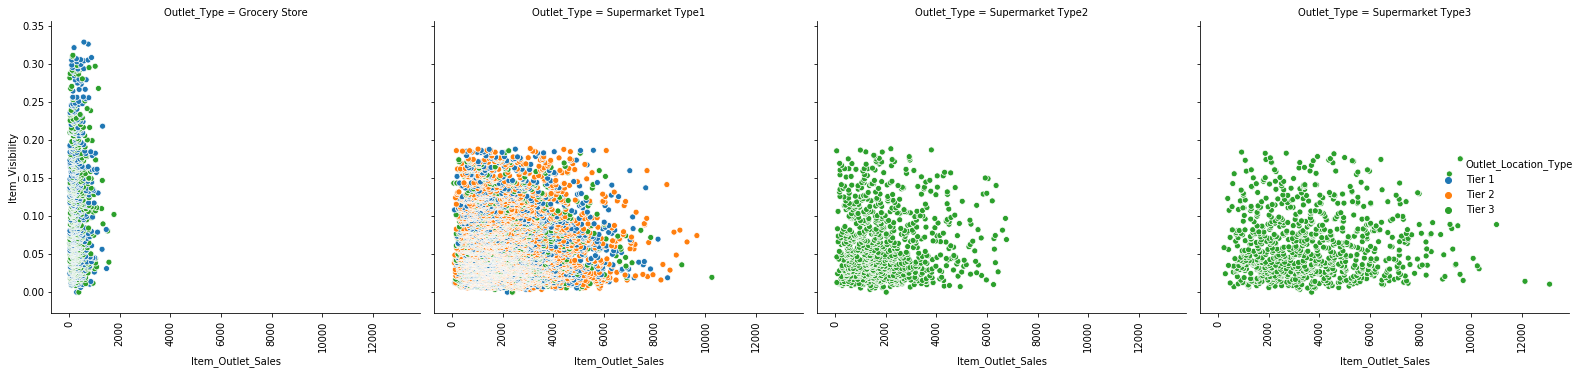

In [21]:
g4=sns.relplot(x='Item_Outlet_Sales', y='Item_Visibility', data=visib_grp2, col='Outlet_Type', hue='Outlet_Location_Type')
plt.tight_layout()
g4.set_xticklabels(rotation=90)

##### By refering to above diagram (g4), there is no significant clustering relationship with item visibility with the Store location, store type or the sales.

In [22]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Understand the sales with respect to Item_Fat_Content

In [23]:
fat_grp=df_train.groupby('Item_Fat_Content')
fat_grp=fat_grp[['Item_Outlet_Sales']].mean().reset_index()
fat_grp

,Item_Fat_Content,Item_Outlet_Sales
0,LF,2073.551928
1,Low Fat,2164.477336
2,Regular,2235.186702
3,low fat,2087.740737
4,reg,1962.192268


### Replace LF & low fat with Low Fat and reg with Regular

In [24]:
def add_fat(cols):
    fat=cols[0]
    if (fat=='LF') or (fat=='low fat'):
        return 'Low Fat'
    elif fat == 'reg':
        return 'Regular'
    else:
        return fat

In [25]:
df_train['Item_Fat_Content']=df_train[['Item_Fat_Content']].apply(add_fat, axis=1)
df_train['Item_Fat_Content'].head(10)

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
5    Regular
6    Regular
7    Low Fat
8    Regular
9    Regular
Name: Item_Fat_Content, dtype: object

### Grouping after data cleaning

In [30]:
fat_grpn=df_train.groupby('Item_Fat_Content')
fat_grpn=fat_grpn[['Item_Outlet_Sales']].agg(['mean','count','sum']).reset_index()
fat_grpn

Item_Fat_Content Item_Outlet_Sales                    
                                mean count           sum
0          Low Fat       2157.711534  5517  1.190409e+07
1          Regular       2224.561170  3006  6.687031e+06

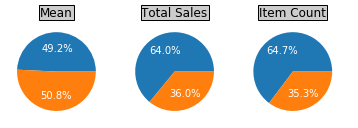

In [45]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
fat_pie1=ax1.pie(fat_grpn[('Item_Outlet_Sales','mean')], labels=fat_grpn['Item_Fat_Content'],autopct='%1.1f%%',textprops={'color':"w"})
fat_pie2=ax2.pie(fat_grpn[('Item_Outlet_Sales','sum')], labels=fat_grpn['Item_Fat_Content'],autopct='%1.1f%%',textprops={'color':"w"})
fat_pie3=ax3.pie(fat_grpn[('Item_Outlet_Sales','count')], labels=fat_grpn['Item_Fat_Content'],autopct='%1.1f%%',textprops={'color':"w"})
ax1.set_title('Mean',bbox={'facecolor':'0.8', 'pad':1})
ax2.set_title('Total Sales',bbox={'facecolor':'0.8', 'pad':1})
ax3.set_title('Item Count',bbox={'facecolor':'0.8', 'pad':1})
plt.show()

#### From above pie charts we can come to an conclusion that more revenue came and most number of unites sold in Low Fat category but the average unit sale is higher in regular product category

In [28]:
fat_grpn=df_train.groupby(['Item_Fat_Content','Item_Type'])
fat_grpn=fat_grpn[['Item_Outlet_Sales']].mean().reset_index()
fat_grpn

,Item_Fat_Content,Item_Type,Item_Outlet_Sales
0,Low Fat,Baking Goods,1764.509636
1,Low Fat,Breads,2183.434031
2,Low Fat,Breakfast,2425.411966
3,Low Fat,Canned,2208.714377
4,Low Fat,Dairy,2145.174151
5,Low Fat,Frozen Foods,2117.535472
6,Low Fat,Fruits and Vegetables,2182.405740
7,Low Fat,Hard Drinks,2139.221622
8,Low Fat,Health and Hygiene,2010.000265
9,Low Fat,Household,2258.784300


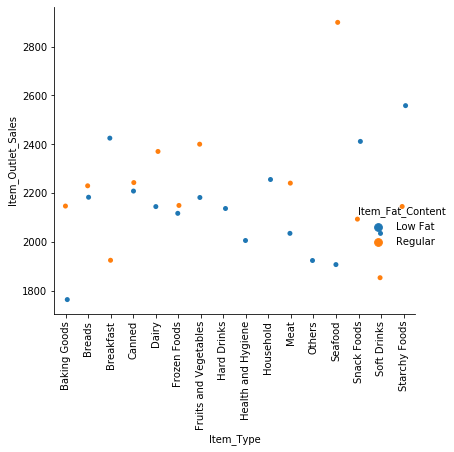

In [29]:
g5=sns.catplot(x='Item_Type', y='Item_Outlet_Sales', data=fat_grpn, hue='Item_Fat_Content')
plt.tight_layout()
g5.set_xticklabels(rotation=90)

#### In here we can see that for most products, orange dots are in higher than the blue dots except for "Breakfast", "Snak Foods", "Soft Drinks" and "Starchy Foods"
#### This represent that the average revenue from all products (except the ones mentioned above) are higher in <b>Regular</b> category

##### For further analysis and predictions, this dataset can be used and it will be available on https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data